
# Presented by:Veda Vyas Donkada
# Task-2 :Prediction using Unsupervised ML

# Problem Statement:From the given ‘Iris’ dataset, predict the optimum number of clusters.



# Algorithms used for visulization of clusters:
1)K-means
2)Agglomerative clustering

Importing data manipulation libraries:

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("Iris.csv",sep=",")

In [3]:
data.shape

(150, 6)

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.describe(include="all")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [6]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
data.Id.nunique()  ### so we can remove this.

150

In [8]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
data.drop("Id",axis=1,inplace=True) ## Not useful for data analysis

Data visulaization:

In [10]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Relationship b/w SepalLength vs PetalLength')

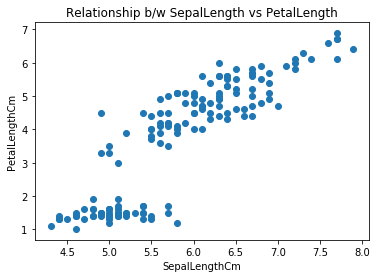

In [11]:
plt.scatter(data.SepalLengthCm,data.PetalLengthCm)
plt.xlabel("SepalLengthCm")
plt.ylabel("PetalLengthCm") 
plt.title("Relationship b/w SepalLength vs PetalLength") ## The relationship is linear

Text(0.5, 1.0, 'Relationship b/w SepalWidth vs PetalWidth')

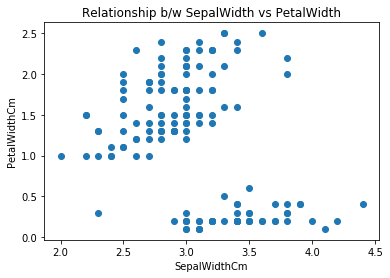

In [12]:
plt.scatter(data.SepalWidthCm,data.PetalWidthCm)
plt.xlabel("SepalWidthCm")
plt.ylabel("PetalWidthCm")
plt.title("Relationship b/w SepalWidth vs PetalWidth")  ## The relation is not linear , it is random

In [13]:
data.isna().sum()     ## There are no missing values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Standardization of numerical attributes

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
num_attr=data.select_dtypes(("int64","float64")).columns

In [16]:
data[num_attr]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
scaler=StandardScaler()
scaler=scaler.fit(data[num_attr])


In [18]:
data[num_attr]=scaler.transform(data[num_attr])

In [19]:
data.describe(include="all")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16,NaN
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,NaN
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00,NaN
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00,NaN
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01,NaN
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01,NaN


In [20]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [21]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'Species'. 
data['Species']= label_encoder.fit_transform(data['Species']) 

data['Species'].unique()

array([0, 1, 2])

In [22]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

Finding optimal number of clusters using elbow method:

In [23]:
from sklearn.cluster import KMeans

In [24]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)

Text(0.5, 1.0, 'Elbow Method For Optimal k')

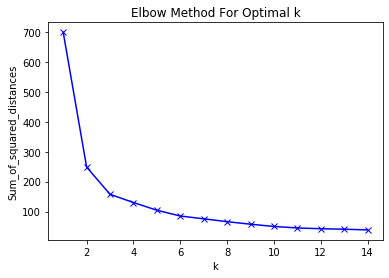

In [25]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')  ## From the elbow method it is quite evident that, optimum no clusters is 3.
                                         ## The within sum of squares is around 100

K-means for cluster Visulaization:

In [26]:
#K means Clustering 
def doKmeans(X, nclust=3):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(data,3)
kmeans = pd.DataFrame(clust_labels)
data.insert((data.shape[1]),'kmeans',kmeans)

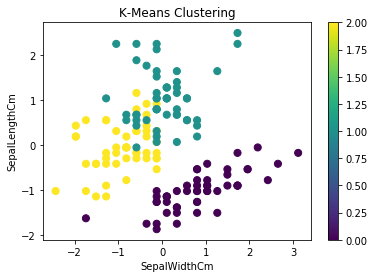

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['SepalWidthCm'],data['SepalLengthCm'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('SepalWidthCm')
ax.set_ylabel('SepalLengthCm')
plt.colorbar(scatter)

Agglomerative

In [28]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
def doAgglomerative(X, nclust=3):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

clust_labels1 = doAgglomerative(data, 3)
agglomerative = pd.DataFrame(clust_labels1)
data.insert((data.shape[1]),'agglomerative',agglomerative)

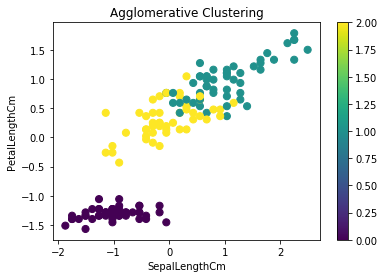

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['SepalLengthCm'],data['PetalLengthCm'],
                     c=agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('PetalLengthCm')
plt.colorbar(scatter)